In [37]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#Loading the dataset
df=pd.read_csv('newdataset2.csv')

In [39]:
df.head(6)

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred Positions
0,32,94,94,95500000,565000,2228,89,63,89,63,...,53,82,62,91,89,92,91,66,92,ST
1,30,93,93,105000000,565000,2154,92,48,90,95,...,45,84,59,92,90,88,91,62,88,RW
2,25,92,94,123000000,280000,2100,94,56,96,82,...,46,79,59,88,87,84,89,64,84,LW
3,30,92,92,97000000,510000,2291,88,78,86,60,...,58,80,65,88,85,88,87,68,88,ST
4,28,91,91,92000000,355000,2143,79,80,78,80,...,57,78,62,87,82,88,84,61,88,ST
5,26,90,91,90500000,295000,2096,93,54,93,91,...,47,81,61,87,87,82,88,64,82,LW


In [40]:
y = df['Value'].as_matrix()
x = df['Overall'].as_matrix()

In [41]:
from sklearn import linear_model, preprocessing
import  sklearn.model_selection
from sklearn import linear_model
X = preprocessing.scale(x)
Y = preprocessing.scale(y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [42]:
import sklearn.model_selection
import numpy.polynomial.polynomial as poly

In [43]:
X.shape

(15143,)

In [44]:
#Using kfold method to find the perfect order
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# Model orders to be tested
dtest = np.arange(0,10)
nd = len(dtest)

# Loop over the folds
RSSts = np.zeros((nd,nfold))
for isplit, Ind in enumerate(kf.split(X)):
        
    # Get the training data in the split
    Itr, Its = Ind
    xtr = X[Itr]
    ytr = Y[Itr]
    xts = X[Its]
    yts = Y[Its]
    
    for it, d in enumerate(dtest):
    
        # Fit data on training data
        beta_hat = poly.polyfit(xtr,ytr,d)
        
        # Measure RSS on test data
        yhat = poly.polyval(xts,beta_hat)
        RSSts[it,isplit] = np.mean((yhat-yts)**2)

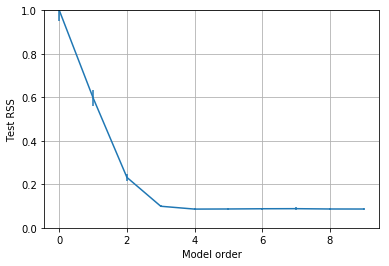

In [45]:
RSS_mean = np.mean(RSSts,axis=1)
RSS_std  = np.std(RSSts,axis=1) / np.sqrt(nfold-1)
plt.errorbar(dtest, RSS_mean, yerr=RSS_std, fmt='-')
plt.ylim(0,1)
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

In [46]:
#Finding the order
imin = np.argmin(RSS_mean)
print("The selected model order is {0:d}".format(dtest[imin]))

The selected model order is 4


The estimated model order is 4


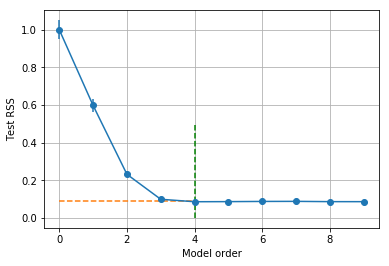

In [47]:
imin = np.argmin(RSS_mean)
RSS_tgt = RSS_mean[imin] + RSS_std[imin]

# Find the lowest model order below the target
I = np.where(RSS_mean <= RSS_tgt)[0]
iopt = I[0]
dopt = dtest[iopt]

plt.errorbar(dtest, RSS_mean, yerr=RSS_std, fmt='o-')

# Plot the line at the RSS target
plt.plot([dtest[0],dtest[imin]], [RSS_tgt, RSS_tgt], '--')

# Plot the line at the optimal model order
plt.plot([dopt,dopt], [0,0.5], 'g--')

#plt.ylim(0,1)
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

# Print results
print("The estimated model order is %d" % dopt)

In [48]:
#Calculating the accuracy
beta_hat = poly.polyfit(X,Y,dopt)
yhat = poly.polyval(X,beta_hat)

RSS_tr=np.mean((yhat-Y)**2)/(np.std(Y)**2)
Rsq_tr=1-RSS_tr
print("Rss per sample={0:f}".format(RSS_tr))
print("R^2=           {0:f}".format(Rsq_tr))

Rss per sample=0.084495
R^2=           0.915505
